# Data preprocessing 1

In [1]:
#Kutubxonalarni yuklaymiz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import  LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import klib
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
import xgboost as xgb
import lightgbm as lgb

In [2]:
#Datamizni ornatamiz
df1=pd.read_csv("corporate_stress_dataset.csv")

C:\Users\user\AppData\Local\Temp\ipykernel_12920\3588148365.py:2: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df1=pd.read_csv("corporate_stress_dataset.csv")


In [3]:
#Bo'shidagi 5 qatorni korib olamiz
df1.head()

,ID,Age,Gender,Marital_Status,Job_Role,Experience_Years,Monthly_Salary_INR,Working_Hours_per_Week,Commute_Time_Hours,Remote_Work,...,Work_Life_Balance,Family_Support_Level,Job_Satisfaction,Performance_Rating,Team_Size,Training_Opportunities,Gender_Bias_Experienced,Discrimination_Experienced,Burnout_Symptoms,Location
0,1,56,Non-Binary,Widowed,Developer,5,102703.08,44,1.72,True,...,9.0,2,5,10.0,38,False,True,True,No,Tier-3
1,2,46,Female,Single,Analyst,20,165583.91,54,0.62,True,...,9.0,1,10,9.0,72,True,True,True,No,Tier-3
2,3,32,Female,Single,Developer,10,38005.39,81,1.22,False,...,6.0,1,1,1.0,67,False,False,False,Yes,Metro
3,4,60,Female,Divorced,Analyst,26,51127.36,79,2.03,False,...,8.0,10,5,10.0,98,True,True,False,Yes,Metro
4,5,25,Male,Married,Sales,29,174597.45,63,1.45,True,...,3.0,1,9,2.0,85,True,False,False,No,Tier-1


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                50000 non-null  int64  
 1   Age                               50000 non-null  int64  
 2   Gender                            50000 non-null  object 
 3   Marital_Status                    50000 non-null  object 
 4   Job_Role                          49999 non-null  object 
 5   Experience_Years                  50000 non-null  int64  
 6   Monthly_Salary_INR                50000 non-null  float64
 7   Working_Hours_per_Week            50000 non-null  int64  
 8   Commute_Time_Hours                49999 non-null  float64
 9   Remote_Work                       50000 non-null  bool   
 10  Stress_Level                      49999 non-null  float64
 11  Health_Issues                     37459 non-null  object 
 12  Comp

c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\klib\describe.py:122: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '10' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  data.loc[data[col].isin(value_counts_idx_top), col] = 10


TypeError: 'bool' object is not subscriptable

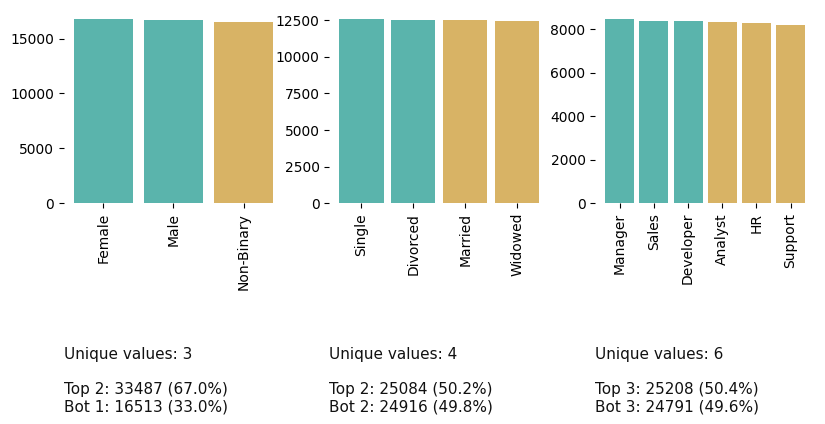

In [5]:
klib.cat_plot(df1, figsize=(44, 16))

In [3]:
#Klib orqali tozalab olamiz
df_reduced = klib.data_cleaning(df1)


Shape of cleaned data: (50000, 30) - Remaining NAs: 12550


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 6.87 MB (-67.95%)



GridSpec(6, 6)

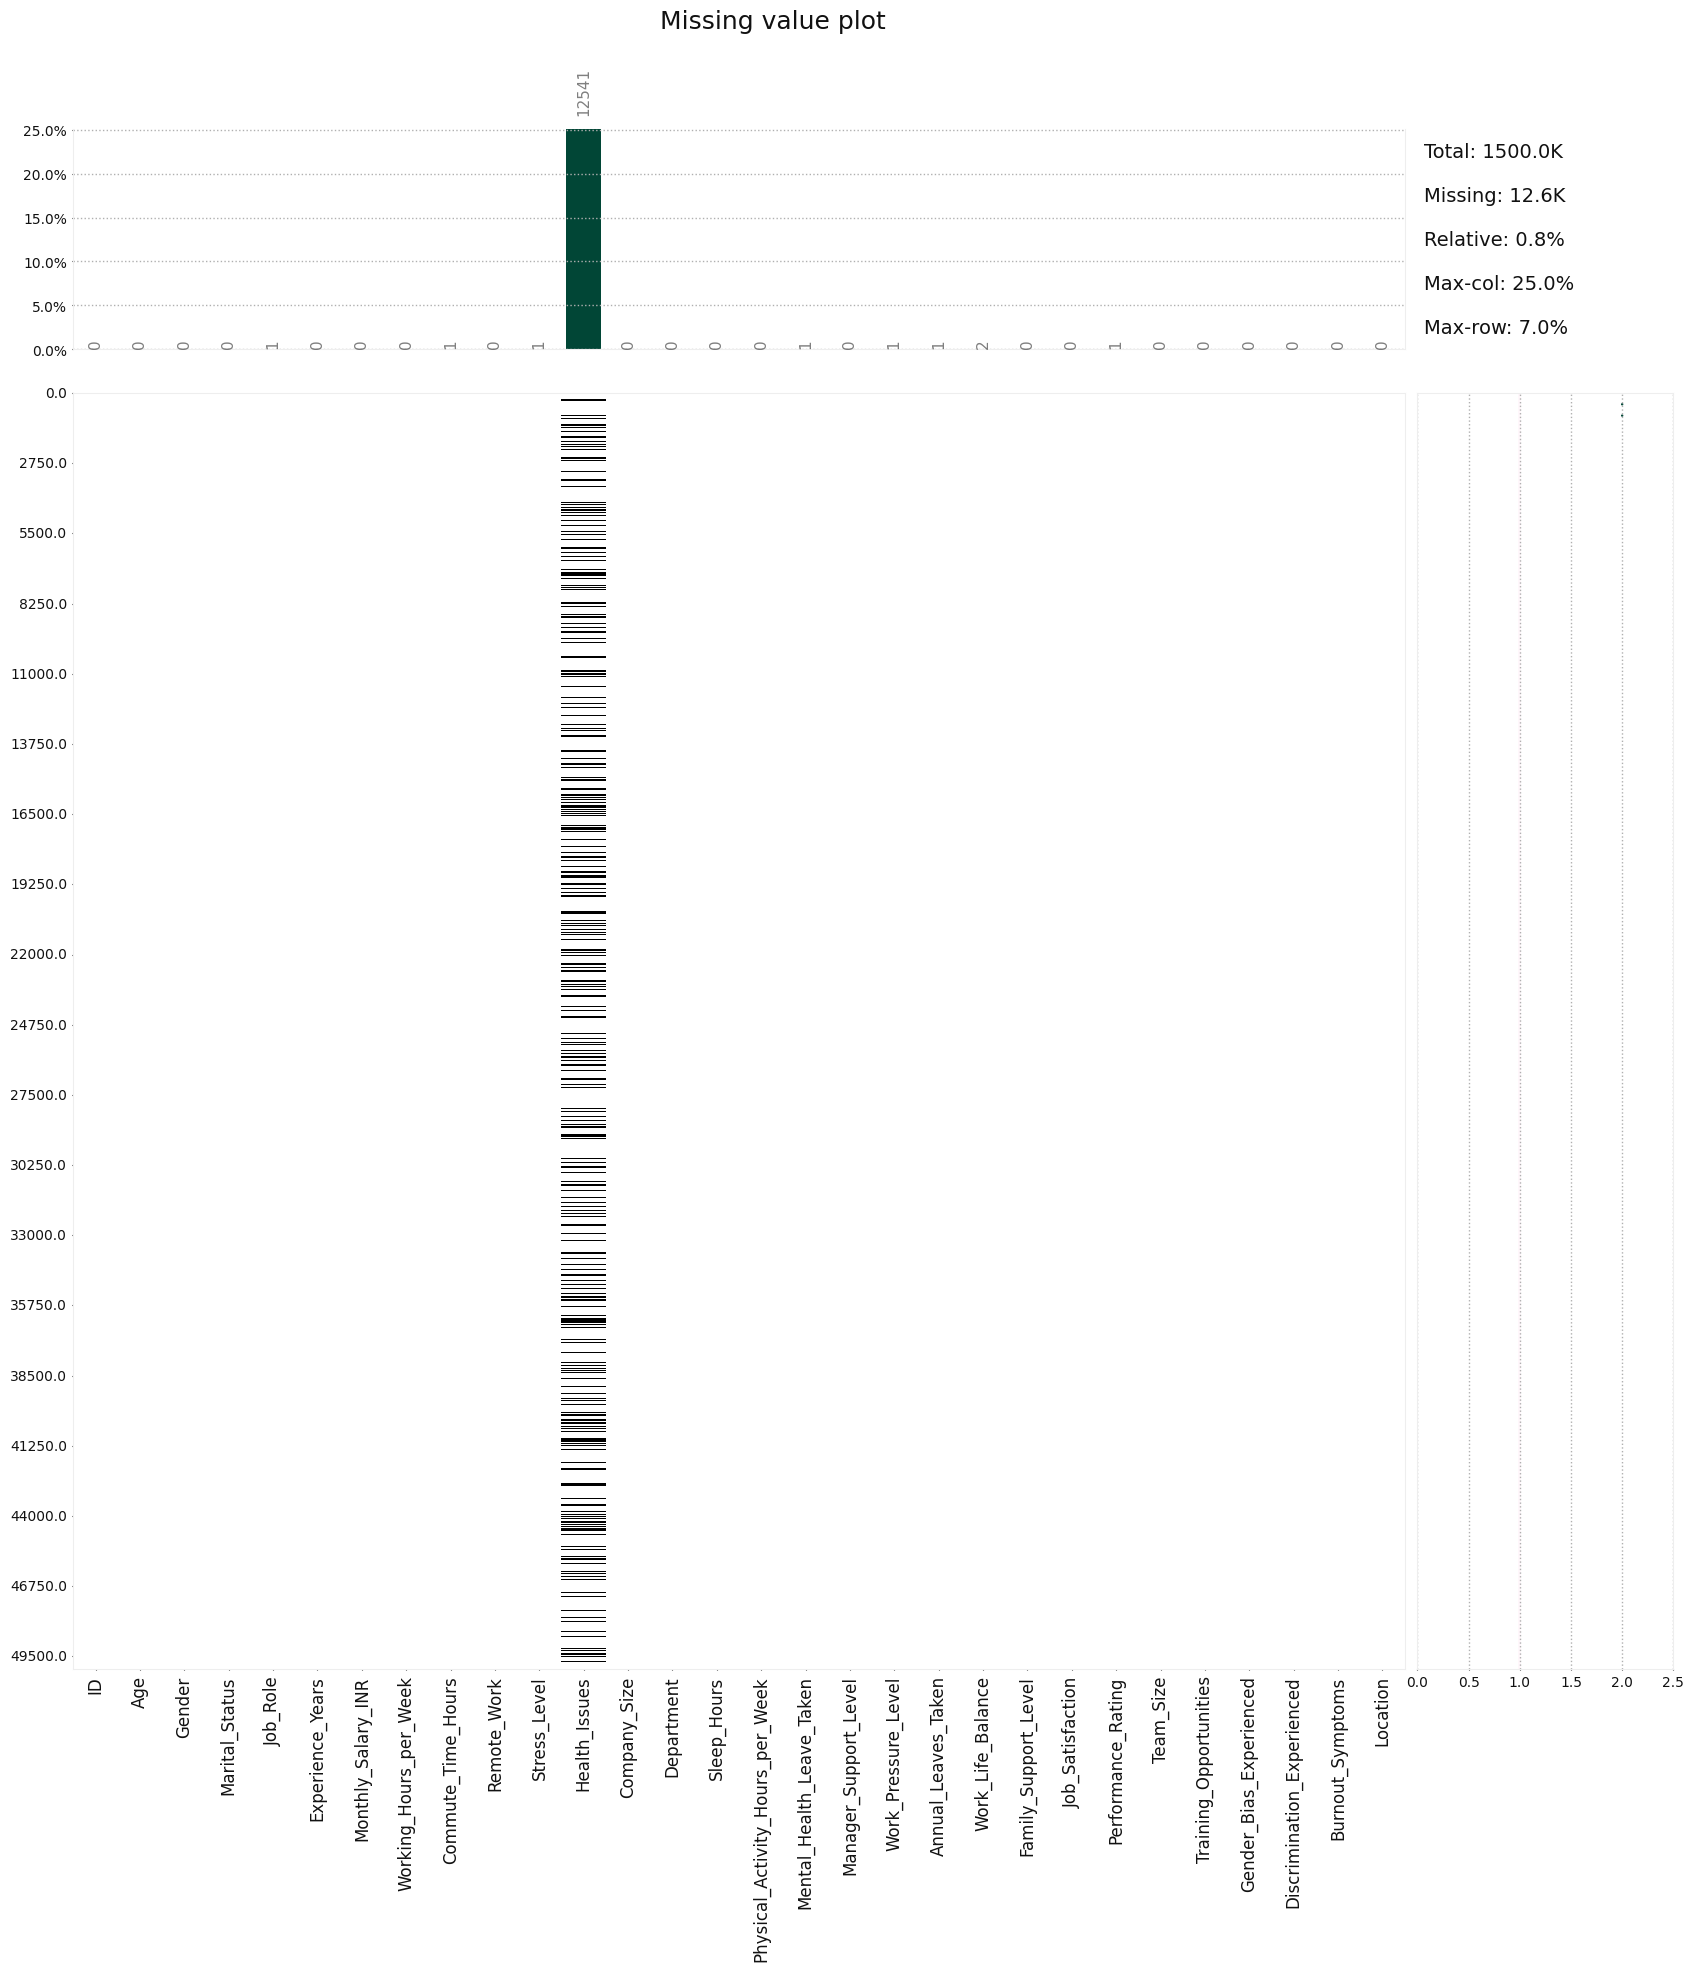

In [4]:
#Klib yordamida tushib qolgan kiymatlarni koramiz
klib.missingval_plot(df1)

In [5]:
df_cleaned = klib.data_cleaning(df1)

Shape of cleaned data: (50000, 30) - Remaining NAs: 12550


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 6.87 MB (-67.95%)



In [9]:
#Tozalangan datani korib olamiz
print(df_cleaned.head())

   id  age      gender marital_status   job_role  experience_years  \
0   1   56  Non-Binary        Widowed  Developer                 5   
1   2   46      Female         Single    Analyst                20   
2   3   32      Female         Single  Developer                10   
3   4   60      Female       Divorced    Analyst                26   
4   5   25        Male        Married      Sales                29   

   monthly_salary_inr  working_hours_per_week  commute_time_hours  \
0           102703.08                      44                1.72   
1           165583.91                      54                0.62   
2            38005.39                      81                1.22   
3            51127.36                      79                2.03   
4           174597.45                      63                1.45   

   remote_work  ...  work_life_balance family_support_level job_satisfaction  \
0         True  ...                9.0                    2                5   
1   

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                50000 non-null  int64  
 1   Age                               50000 non-null  int64  
 2   Gender                            50000 non-null  object 
 3   Marital_Status                    50000 non-null  object 
 4   Job_Role                          49999 non-null  object 
 5   Experience_Years                  50000 non-null  int64  
 6   Monthly_Salary_INR                50000 non-null  float64
 7   Working_Hours_per_Week            50000 non-null  int64  
 8   Commute_Time_Hours                49999 non-null  float64
 9   Remote_Work                       50000 non-null  bool   
 10  Stress_Level                      49999 non-null  float64
 11  Health_Issues                     37459 non-null  object 
 12  Comp

In [6]:
#Kerak emas bo'lgan classlarni ovoramiz
df1.drop("Remote_Work", axis=1, inplace=True)
df1.drop("Company_Size", axis=1, inplace=True)
df1.drop("Location", axis=1, inplace=True)
df1.drop("ID", axis=1, inplace=True)

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               50000 non-null  int64  
 1   Gender                            50000 non-null  object 
 2   Marital_Status                    50000 non-null  object 
 3   Job_Role                          49999 non-null  object 
 4   Experience_Years                  50000 non-null  int64  
 5   Monthly_Salary_INR                50000 non-null  float64
 6   Working_Hours_per_Week            50000 non-null  int64  
 7   Commute_Time_Hours                49999 non-null  float64
 8   Stress_Level                      49999 non-null  float64
 9   Health_Issues                     37459 non-null  object 
 10  Department                        50000 non-null  object 
 11  Sleep_Hours                       50000 non-null  float64
 12  Phys

In [7]:
#Tushib qolgan kiymatlarni koramiz
df1.isnull().sum()

Age                                     0
Gender                                  0
Marital_Status                          0
Job_Role                                1
Experience_Years                        0
Monthly_Salary_INR                      0
Working_Hours_per_Week                  0
Commute_Time_Hours                      1
Stress_Level                            1
Health_Issues                       12541
Department                              0
Sleep_Hours                             0
Physical_Activity_Hours_per_Week        0
Mental_Health_Leave_Taken               1
Manager_Support_Level                   0
Work_Pressure_Level                     1
Annual_Leaves_Taken                     1
Work_Life_Balance                       2
Family_Support_Level                    0
Job_Satisfaction                        0
Performance_Rating                      1
Team_Size                               0
Training_Opportunities                  0
Gender_Bias_Experienced           

In [8]:
#Tushib qolgan kiymatlarni to'ldiramiz
for col in df1.columns:
  if df1[col].isnull().sum()>0:
    if df1[col].dtype == 'object':
      df1[col].fillna(df1[col].mode()[0], inplace=True)
    else:
      df1[col].fillna(df1[col].mean(), inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_12920\2201541249.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].fillna(df1[col].mode()[0], inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_12920\2201541249.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

In [15]:
df1.isnull().sum()

Age                                 0
Gender                              0
Marital_Status                      0
Job_Role                            0
Experience_Years                    0
Monthly_Salary_INR                  0
Working_Hours_per_Week              0
Commute_Time_Hours                  0
Stress_Level                        0
Health_Issues                       0
Department                          0
Sleep_Hours                         0
Physical_Activity_Hours_per_Week    0
Mental_Health_Leave_Taken           0
Manager_Support_Level               0
Work_Pressure_Level                 0
Annual_Leaves_Taken                 0
Work_Life_Balance                   0
Family_Support_Level                0
Job_Satisfaction                    0
Performance_Rating                  0
Team_Size                           0
Training_Opportunities              0
Gender_Bias_Experienced             0
Discrimination_Experienced          0
Burnout_Symptoms                    0
dtype: int64

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               50000 non-null  int64  
 1   Gender                            50000 non-null  object 
 2   Marital_Status                    50000 non-null  object 
 3   Job_Role                          50000 non-null  object 
 4   Experience_Years                  50000 non-null  int64  
 5   Monthly_Salary_INR                50000 non-null  float64
 6   Working_Hours_per_Week            50000 non-null  int64  
 7   Commute_Time_Hours                50000 non-null  float64
 8   Stress_Level                      50000 non-null  float64
 9   Health_Issues                     50000 non-null  object 
 10  Department                        50000 non-null  object 
 11  Sleep_Hours                       50000 non-null  float64
 12  Phys

In [9]:
# bizda boolean columnlar bor edi ulardi intga otkazdik
bool_columns = df1.select_dtypes(include='bool').columns  # Get all boolean columns
df1[bool_columns] = df1[bool_columns].astype(int)

In [10]:
# bizda object columnlar bor edi ulardi str otkazdik
bool_columns = df1.select_dtypes(include='object').columns  # Get all boolean columns
df1[bool_columns] = df1[bool_columns].astype(str)

In [11]:
# bizda float columnlar bor edi ulardi intga otkazdik
float_columns = df1.select_dtypes(include='float64').columns

df1[float_columns] = df1[float_columns].apply(lambda x: x.fillna(x.median()))  # Replace NaN with median of the column
df1[float_columns] = df1[float_columns].applymap(lambda x: x if np.isfinite(x) else 0)  # Replace Inf with 0

df1[float_columns] = df1[float_columns].round().astype(int)

C:\Users\user\AppData\Local\Temp\ipykernel_12920\2269338934.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df1[float_columns] = df1[float_columns].applymap(lambda x: x if np.isfinite(x) else 0)  # Replace Inf with 0


In [12]:
bool_columns = df1.select_dtypes(include='object')

print(bool_columns)

           Gender Marital_Status   Job_Role Health_Issues Department  \
0      Non-Binary        Widowed  Developer        Mental  Marketing   
1          Female         Single    Analyst        Mental         IT   
2          Female         Single  Developer      Physical         HR   
3          Female       Divorced    Analyst        Mental         IT   
4            Male        Married      Sales          Both      Sales   
...           ...            ...        ...           ...        ...   
49995      Female        Widowed         HR        Mental  Marketing   
49996        Male         Single    Analyst      Physical         HR   
49997      Female       Divorced    Manager        Mental      Sales   
49998        Male        Married         HR          Both      Admin   
49999      Female       Divorced    Manager          Both    Finance   

      Mental_Health_Leave_Taken Burnout_Symptoms  
0                         FALSE               No  
1                          TRUE  

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Age                               50000 non-null  int64 
 1   Gender                            50000 non-null  object
 2   Marital_Status                    50000 non-null  object
 3   Job_Role                          50000 non-null  object
 4   Experience_Years                  50000 non-null  int64 
 5   Monthly_Salary_INR                50000 non-null  int64 
 6   Working_Hours_per_Week            50000 non-null  int64 
 7   Commute_Time_Hours                50000 non-null  int64 
 8   Stress_Level                      50000 non-null  int64 
 9   Health_Issues                     50000 non-null  object
 10  Department                        50000 non-null  object
 11  Sleep_Hours                       50000 non-null  int64 
 12  Physical_Activity_

In [22]:
print(df1.columns.tolist())

['Age', 'Gender', 'Marital_Status', 'Job_Role', 'Experience_Years', 'Monthly_Salary_INR', 'Working_Hours_per_Week', 'Commute_Time_Hours', 'Stress_Level', 'Health_Issues', 'Department', 'Sleep_Hours', 'Physical_Activity_Hours_per_Week', 'Mental_Health_Leave_Taken', 'Manager_Support_Level', 'Work_Pressure_Level', 'Annual_Leaves_Taken', 'Work_Life_Balance', 'Family_Support_Level', 'Job_Satisfaction', 'Performance_Rating', 'Team_Size', 'Training_Opportunities', 'Gender_Bias_Experienced', 'Discrimination_Experienced', 'Burnout_Symptoms']


In [23]:
# Nechta Objects columns borligini aniqlab olamiz
object_columns = df1.select_dtypes(include=['object'])
print(f"Number of object columns: {len(object_columns.columns)}")
print("Object columns:")
print(object_columns.columns.tolist())

Number of object columns: 7
Object columns:
['Gender', 'Marital_Status', 'Job_Role', 'Health_Issues', 'Department', 'Mental_Health_Leave_Taken', 'Burnout_Symptoms']


In [14]:
# Har bir obkects ni cardinalitylarini korib olamiz
categorical_cols = ['Gender', 'Marital_Status', 'Job_Role', 'Health_Issues', 'Department', 'Mental_Health_Leave_Taken', 'Burnout_Symptoms',]

for col in categorical_cols:
    print(f"Cardinality of '{col}': {df1[col].nunique()}")

Cardinality of 'Gender': 3
Cardinality of 'Marital_Status': 4
Cardinality of 'Job_Role': 6
Cardinality of 'Health_Issues': 3
Cardinality of 'Department': 6
Cardinality of 'Mental_Health_Leave_Taken': 6
Cardinality of 'Burnout_Symptoms': 4


In [15]:
# cardinality ni koramiz
cardinality=df1[categorical_cols].nunique()

In [16]:
#
cardinality

Gender                       3
Marital_Status               4
Job_Role                     6
Health_Issues                3
Department                   6
Mental_Health_Leave_Taken    6
Burnout_Symptoms             4
dtype: int64

In [17]:
# High va Low cardinalityga ajratib olamiz
categorical_cols = df1.select_dtypes(include=['object']).columns

# classlar soni 5 dan yuqori bolsa u high cordinality hisoblanadi
high_cardinality_cols = [col for col in categorical_cols if df1[col].nunique() > 5]

print("High cardinality columns:", high_cardinality_cols)


High cardinality columns: ['Job_Role', 'Department', 'Mental_Health_Leave_Taken']


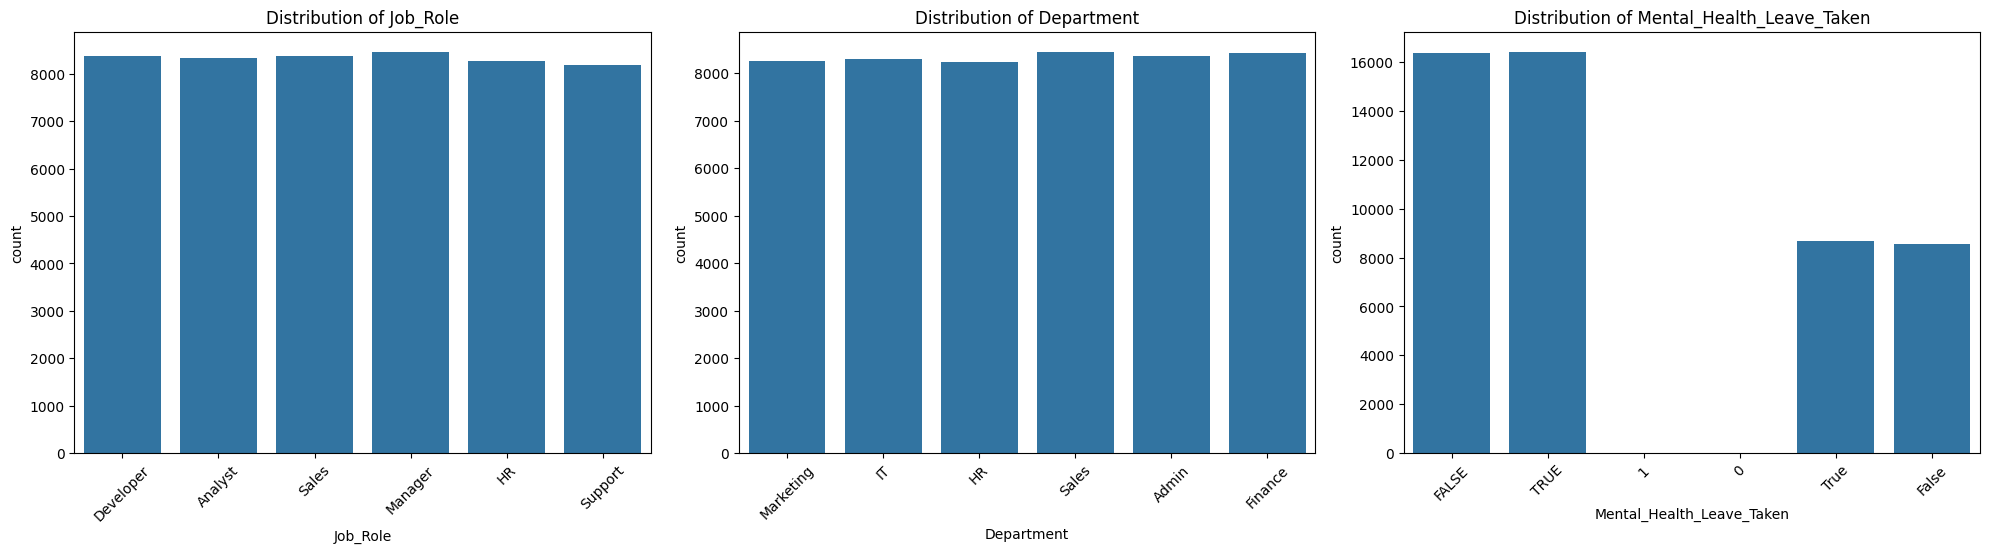

In [28]:
# plotingda high corrdinalityni korib olamiz
plt.figure(figsize=(20, 10))


for i, col in enumerate(high_cardinality_cols, 1):
    plt.subplot(len(high_cardinality_cols) // 3 + 1, 3, i)
    sns.countplot(x=df1[col])
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [18]:
# High cordinalityni label encoding ga qoyamiz

label_encoder = LabelEncoder()

# Columns to be label-encoded
columns_to_encode = ['Job_Role', 'Department', 'Mental_Health_Leave_Taken']

# har bir high cordinality ustunga label encodingni qollaymiz
for column in columns_to_encode:
    df1[column] = label_encoder.fit_transform(df1[column])

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Age                               50000 non-null  int64 
 1   Gender                            50000 non-null  object
 2   Marital_Status                    50000 non-null  object
 3   Job_Role                          50000 non-null  int64 
 4   Experience_Years                  50000 non-null  int64 
 5   Monthly_Salary_INR                50000 non-null  int64 
 6   Working_Hours_per_Week            50000 non-null  int64 
 7   Commute_Time_Hours                50000 non-null  int64 
 8   Stress_Level                      50000 non-null  int64 
 9   Health_Issues                     50000 non-null  object
 10  Department                        50000 non-null  int64 
 11  Sleep_Hours                       50000 non-null  int64 
 12  Physical_Activity_

In [20]:
# agar classlar soni 5 dan kichik bolsa uni low cordinality deb oldik
low_cardinality_cols = [col for col in categorical_cols if df1[col].nunique() <= 5]

print("Low cardinality columns:", low_cardinality_cols)

Low cardinality columns: ['Gender', 'Marital_Status', 'Health_Issues', 'Burnout_Symptoms']


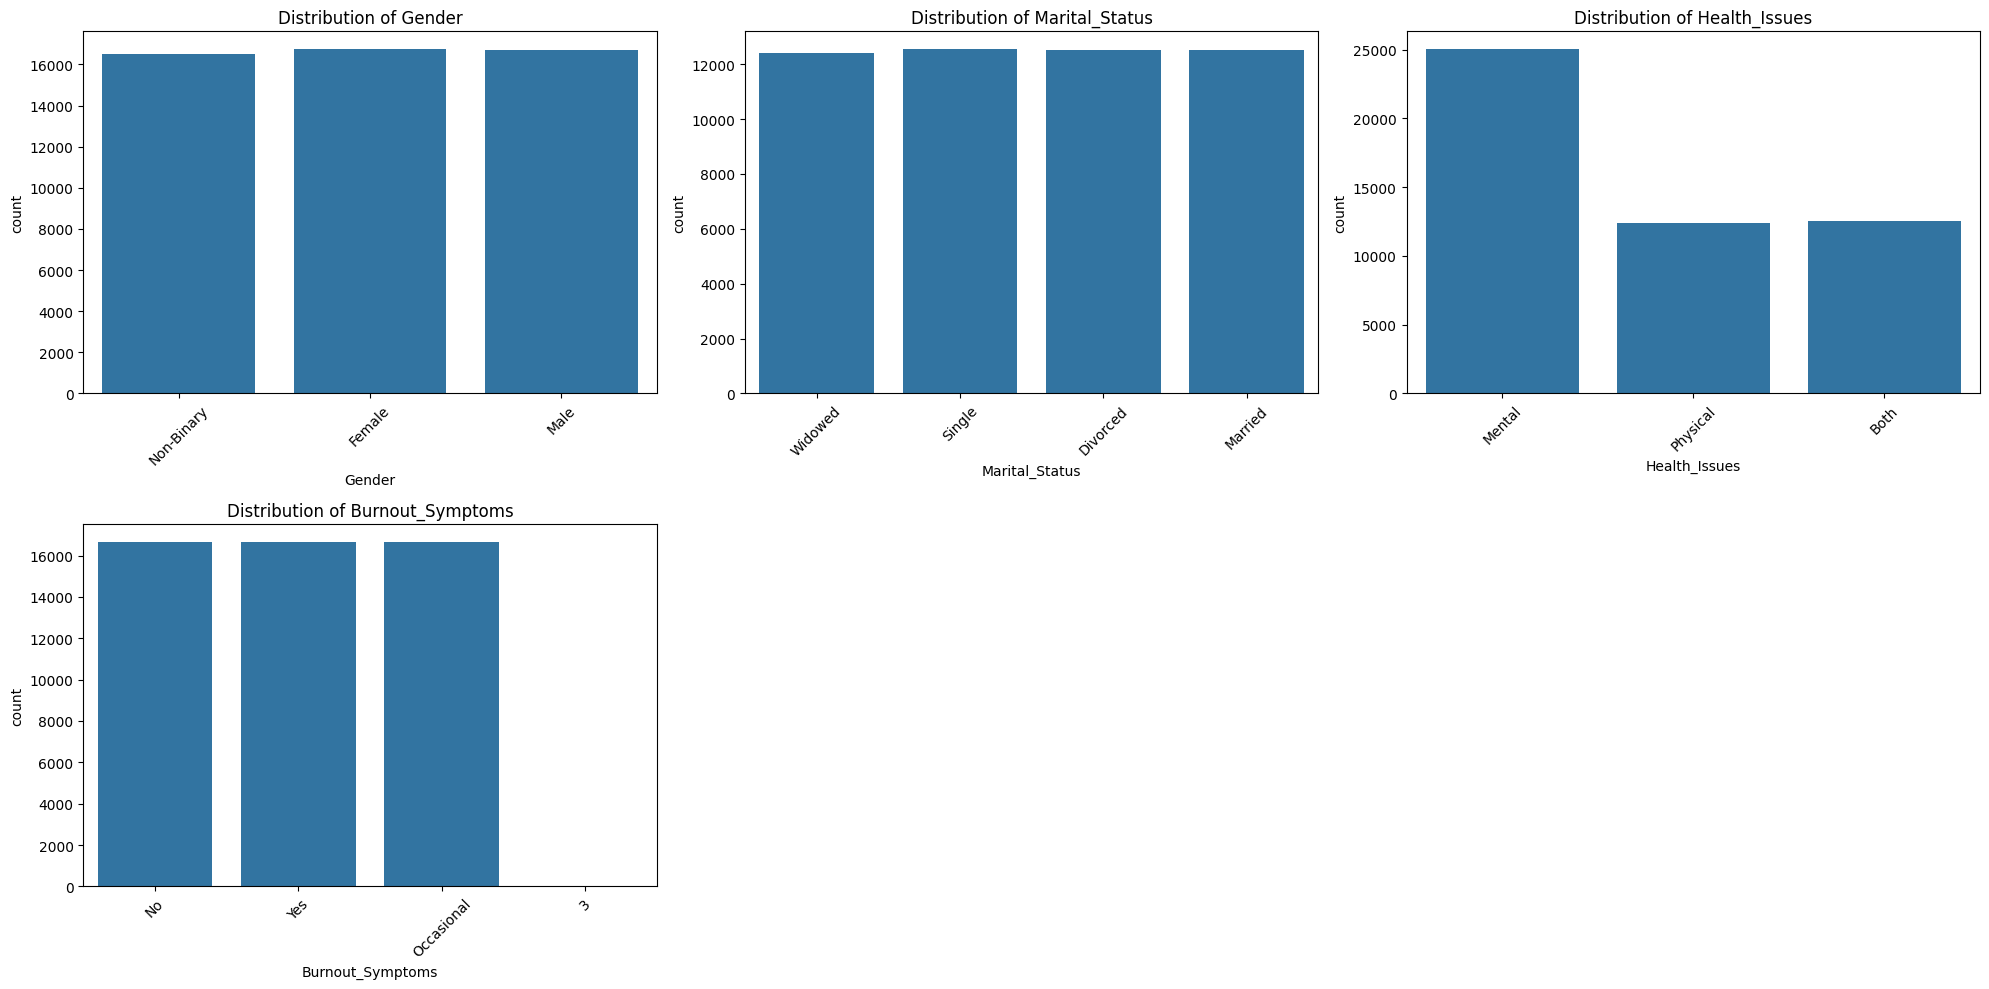

In [21]:
# ploting orqali korib olamiz
plt.figure(figsize=(20, 10))


for i, col in enumerate(low_cardinality_cols, 1):
    plt.subplot(len(low_cardinality_cols) // 3 + 1, 3, i)
    sns.countplot(x=df1[col])
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

In [22]:
label_encoder = LabelEncoder()

#  Label Encoding >>> 'Gender', 'Health_Issues', 'Mental_Health_Leave_Taken', 'Burnout_Symptoms'
label_columns = ['Gender', 'Marital_Status', 'Health_Issues', 'Burnout_Symptoms',]
for column in label_columns:
    df1[column] = label_encoder.fit_transform(df1[column])
print(df1.head())

   Age  Gender  Marital_Status  Job_Role  Experience_Years  \
0   56       2               3         1                 5   
1   46       0               2         0                20   
2   32       0               2         1                10   
3   60       0               0         0                26   
4   25       1               1         4                29   

   Monthly_Salary_INR  Working_Hours_per_Week  Commute_Time_Hours  \
0              102703                      44                   2   
1              165584                      54                   1   
2               38005                      81                   1   
3               51127                      79                   2   
4              174597                      63                   1   

   Stress_Level  Health_Issues  ...  Annual_Leaves_Taken  Work_Life_Balance  \
0             0              1  ...                   15                  9   
1             7              1  ...                   

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   Age                               50000 non-null  int64
 1   Gender                            50000 non-null  int64
 2   Marital_Status                    50000 non-null  int64
 3   Job_Role                          50000 non-null  int64
 4   Experience_Years                  50000 non-null  int64
 5   Monthly_Salary_INR                50000 non-null  int64
 6   Working_Hours_per_Week            50000 non-null  int64
 7   Commute_Time_Hours                50000 non-null  int64
 8   Stress_Level                      50000 non-null  int64
 9   Health_Issues                     50000 non-null  int64
 10  Department                        50000 non-null  int64
 11  Sleep_Hours                       50000 non-null  int64
 12  Physical_Activity_Hours_per_Week

In [24]:
df1.duplicated().sum()

np.int64(0)

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_columns = ['Age', 'Experience_Years', 'Monthly_Salary_INR', 'Working_Hours_per_Week', 'Commute_Time_Hours', 
                     'Stress_Level', 'Sleep_Hours', 'Physical_Activity_Hours_per_Week', 'Work_Pressure_Level', 
                     'Annual_Leaves_Taken', 'Work_Life_Balance', 'Performance_Rating', 'Team_Size']

df1[numerical_columns] = scaler.fit_transform(df1[numerical_columns])

print(df1.head())


        Age  Gender  Marital_Status  Job_Role  Experience_Years  \
0  1.046863       2               3         1         -1.273415   
1  0.323961       0               2         0         -0.006048   
2 -0.688101       0               2         1         -0.850959   
3  1.336023       0               0         0          0.500899   
4 -1.194132       1               1         4          0.754372   

   Monthly_Salary_INR  Working_Hours_per_Week  Commute_Time_Hours  \
0           -0.142636               -1.146484            0.520325   
1            1.065008               -0.528041           -0.520867   
2           -1.385176                1.141754           -0.520867   
3           -1.133165                1.018065            0.520325   
4            1.238105                0.028557           -0.520867   

   Stress_Level  Health_Issues  ...  Annual_Leaves_Taken  Work_Life_Balance  \
0     -1.586409              1  ...             0.000881           1.264574   
1      0.632495         

In [27]:
# Create a feature that captures work-life balance ratio
df1['Work_Life_Ratio'] = df1['Working_Hours_per_Week'] / df1['Sleep_Hours']

# Verify the new feature
print(df1[['Working_Hours_per_Week', 'Sleep_Hours', 'Work_Life_Ratio']].head())


   Working_Hours_per_Week  Sleep_Hours  Work_Life_Ratio
0               -1.146484    -0.328744         3.487467
1               -0.528041     1.680693        -0.314181
2                1.141754     1.010881         1.129464
3                1.018065    -1.668369        -0.610216
4                0.028557    -1.668369        -0.017117


# Visual

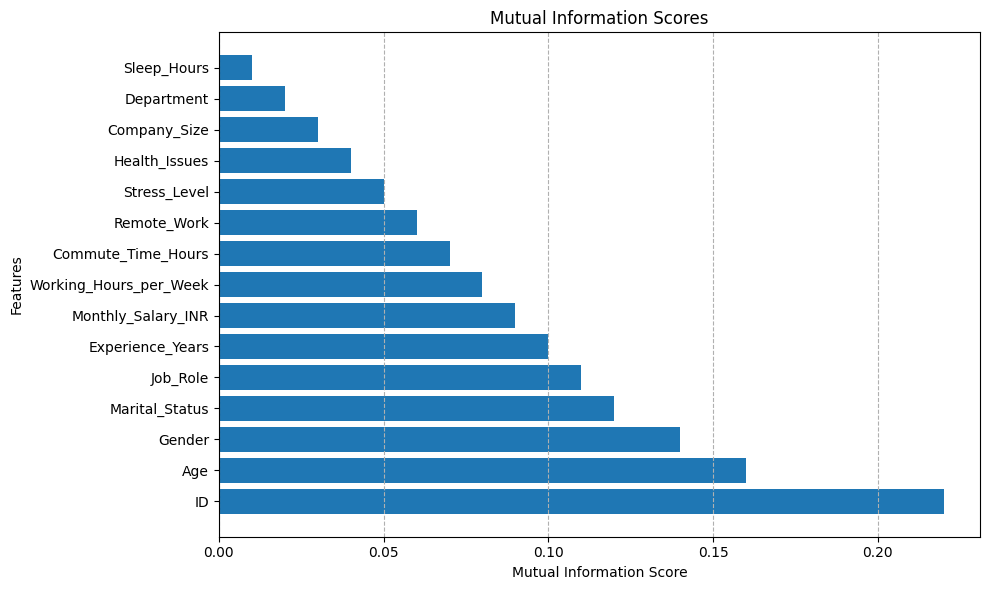

In [36]:
import matplotlib.pyplot as plt

features = [
    'ID', 'Age', 'Gender', 'Marital_Status', 'Job_Role',
    'Experience_Years', 'Monthly_Salary_INR', 'Working_Hours_per_Week',
    'Commute_Time_Hours', 'Remote_Work', 'Stress_Level',
    'Health_Issues', 'Company_Size', 'Department', 'Sleep_Hours'
]

mutual_info_scores = [0.22, 0.16, 0.14, 0.12, 0.11, 0.10, 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02, 0.01]

plt.figure(figsize=(10, 6))
plt.barh(features, mutual_info_scores)
plt.xlabel('Mutual Information Score')
plt.ylabel('Features')
plt.title('Mutual Information Scores')
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()


                Age       Gender  Marital_Status      Job_Role  \
count  50000.000000  50000.00000    50000.000000  50000.000000   
mean      41.518600      0.99488        1.497760      2.494500   
std       13.833279      0.81586        1.116826      1.703475   
min       18.000000      0.00000        0.000000      0.000000   
25%       30.000000      0.00000        0.000000      1.000000   
50%       41.000000      1.00000        1.000000      3.000000   
75%       54.000000      2.00000        2.000000      4.000000   
max       65.000000      2.00000        3.000000      5.000000   

       Experience_Years  Monthly_Salary_INR  Working_Hours_per_Week  \
count      50000.000000        50000.000000             50000.00000   
mean          20.071580       110129.927480                62.53824   
std           11.835681        52069.676956                16.16981   
min            0.000000        20002.000000                35.00000   
25%           10.000000        64875.500000       

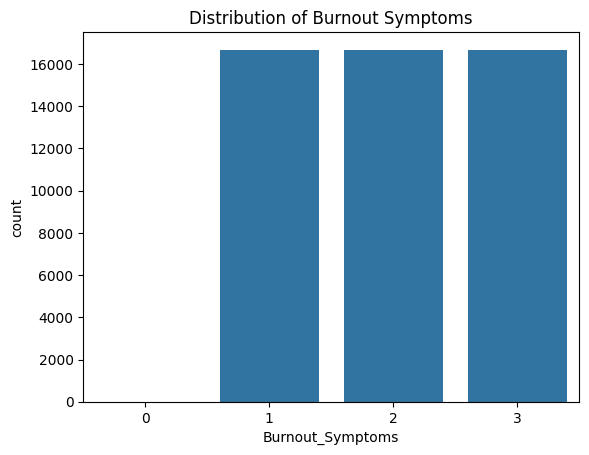

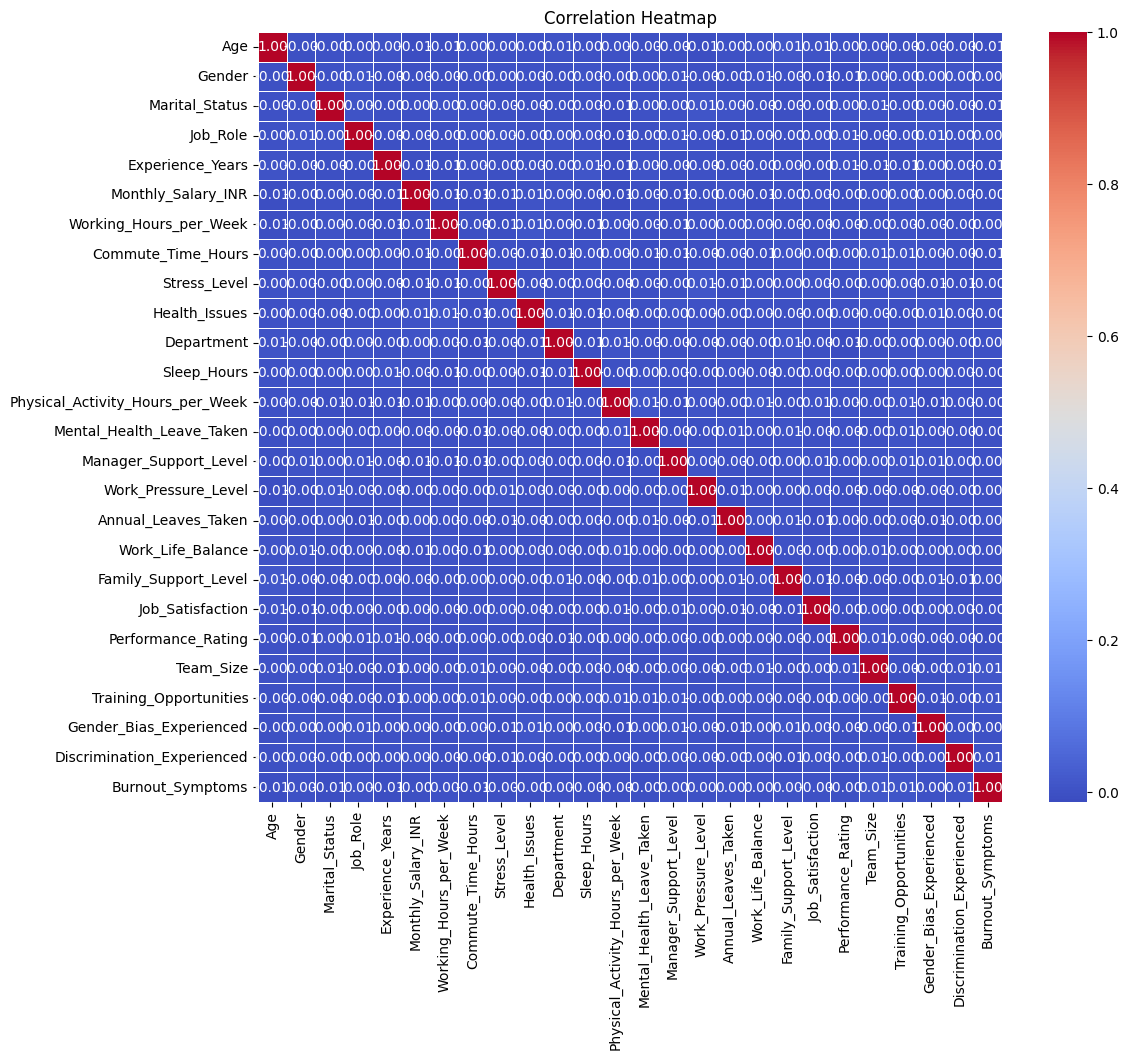

In [37]:
# Summary statistics
print(df1.describe())

# Distribution of target variable 'Burnout_Symptoms'
sns.countplot(x='Burnout_Symptoms', data=df1)
plt.title('Distribution of Burnout Symptoms')
plt.show()

# Correlation heatmap
corr = df1.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

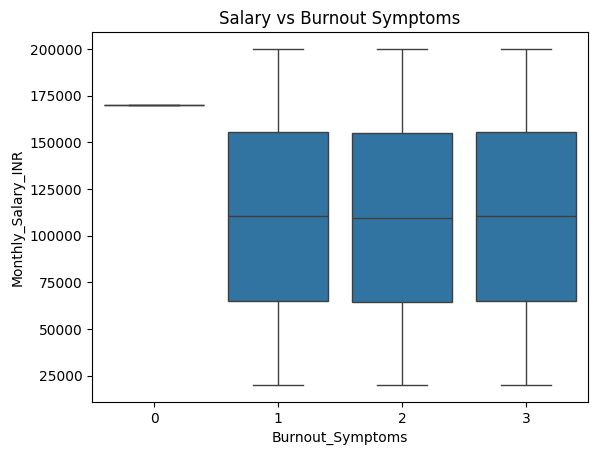

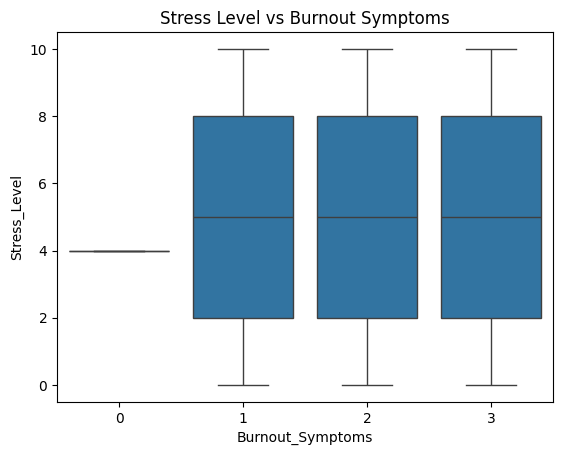

In [38]:
# Visualizing feature relationships with the target variable
sns.boxplot(x='Burnout_Symptoms', y='Monthly_Salary_INR', data=df1)
plt.title('Salary vs Burnout Symptoms')
plt.show()

sns.boxplot(x='Burnout_Symptoms', y='Stress_Level', data=df1)
plt.title('Stress Level vs Burnout Symptoms')
plt.show()


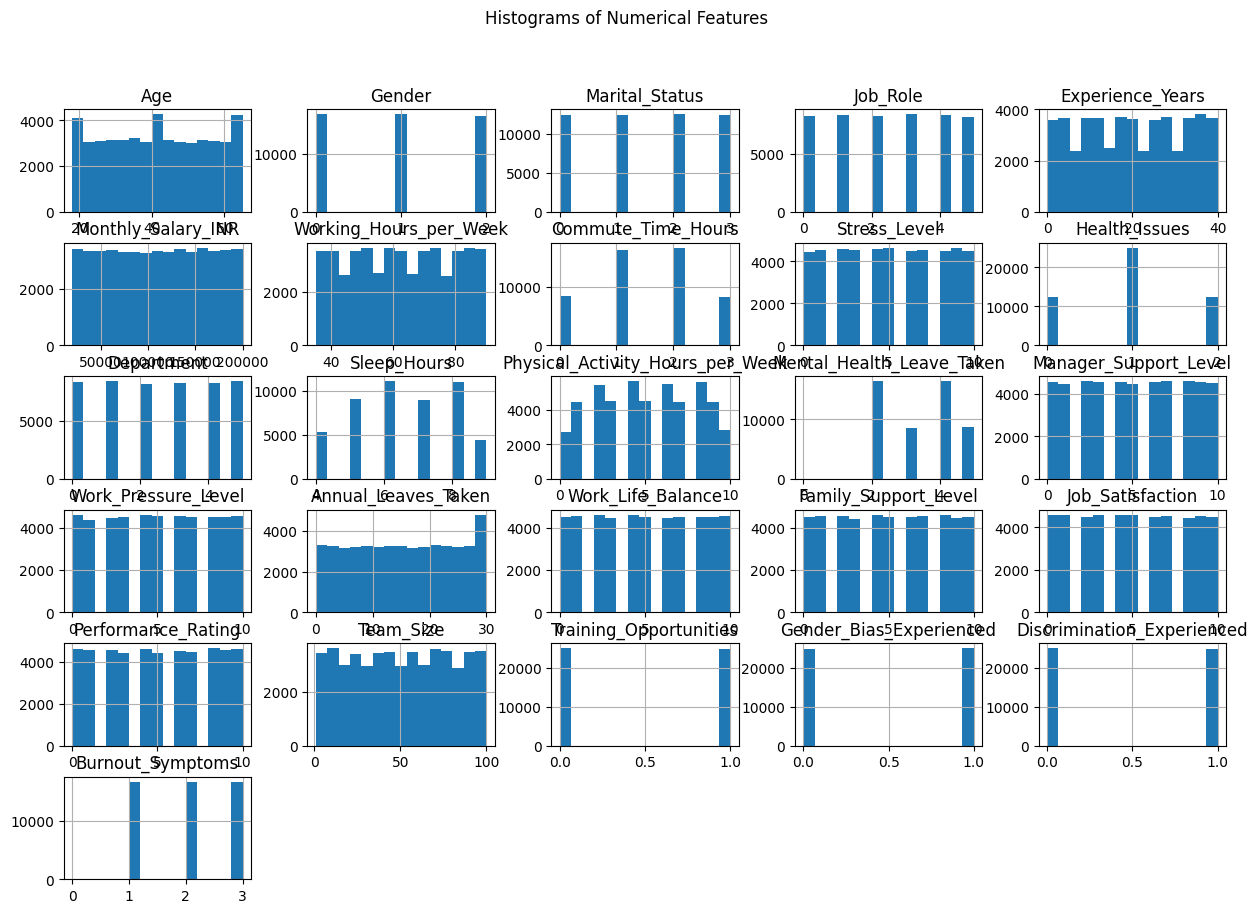

In [39]:
# Histogram for numerical features
numerical_columns = df1.select_dtypes(include=['int64']).columns
df1[numerical_columns].hist(bins=15, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()


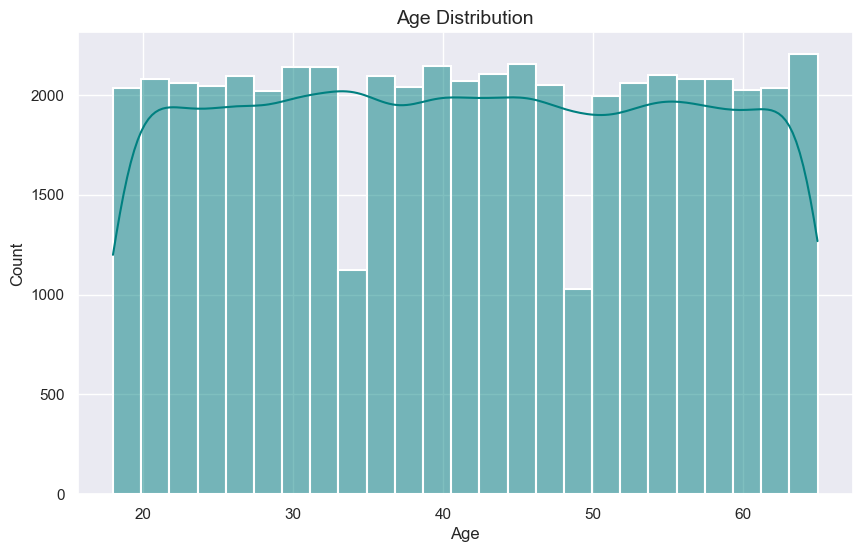

In [40]:
# Set a custom theme
sns.set_theme(style="darkgrid", palette="muted")

# Example plot: Distribution of `Age` with customized style
plt.figure(figsize=(10, 6))
sns.histplot(df1['Age'], kde=True, color='teal', bins=25, linewidth=1.5)
plt.title('Age Distribution', fontsize=14)
plt.show()


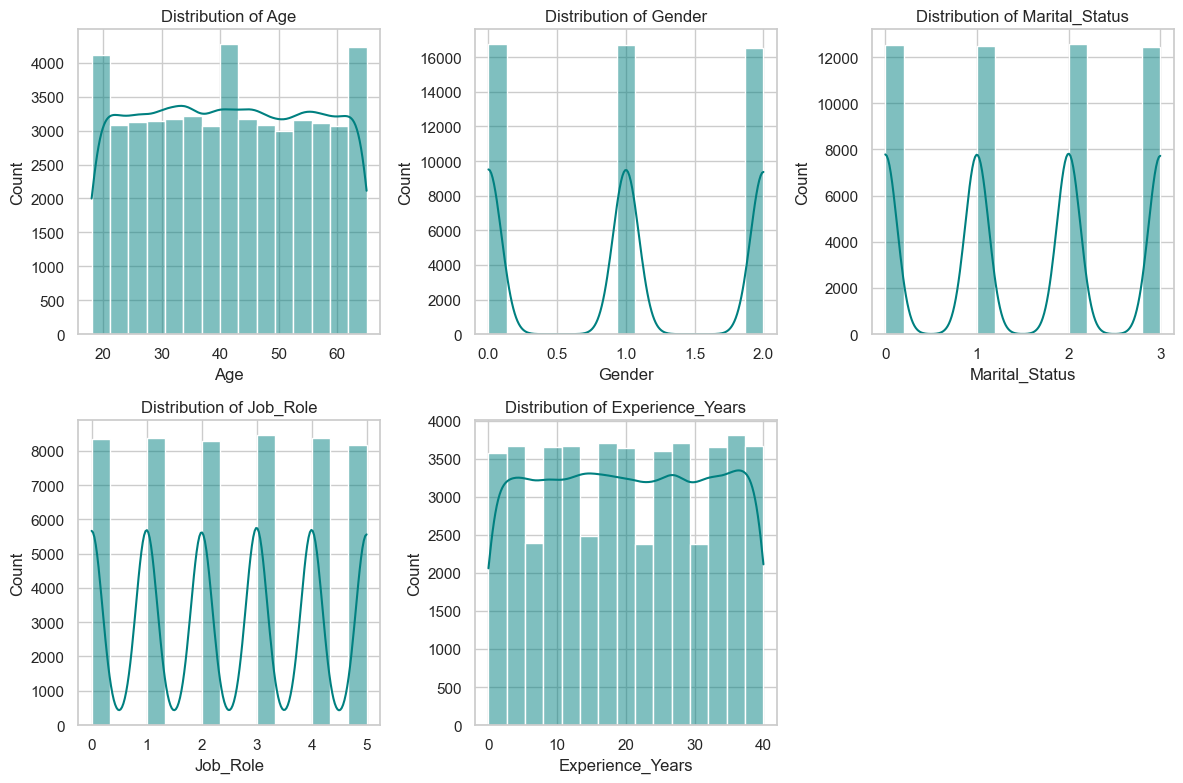

In [41]:
# Set the style for simplicity and readability
sns.set(style="whitegrid")

# Plotting histograms for the first 5 numerical features
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns[:5], 1):  # Only plotting the first 5 columns for simplicity
    plt.subplot(2, 3, i)  # Create a 2x3 grid of subplots
    sns.histplot(df1[column], kde=True, color='teal', bins=15)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()


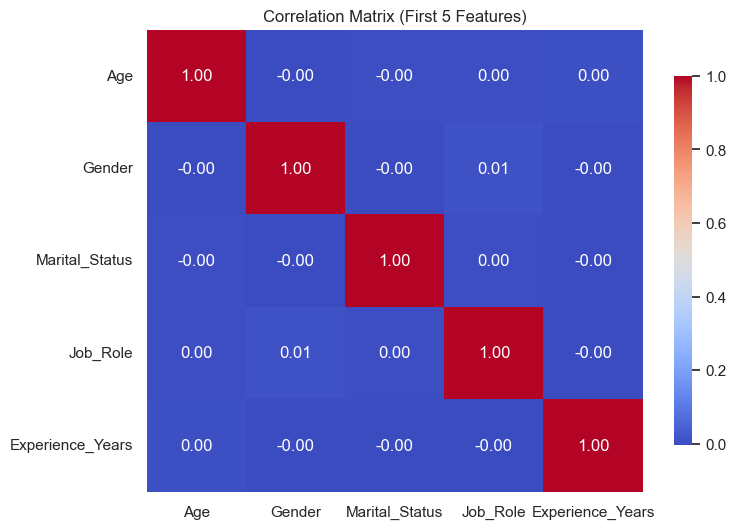

In [42]:
# Compute the correlation matrix for the first 5 columns
correlation_matrix = df1[numerical_columns[:5]].corr()

# Set up the matplotlib figure with a smaller size
plt.figure(figsize=(8, 6))

# Create a simple heatmap for correlation
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={"shrink": .8})
plt.title('Correlation Matrix (First 5 Features)')
plt.show()


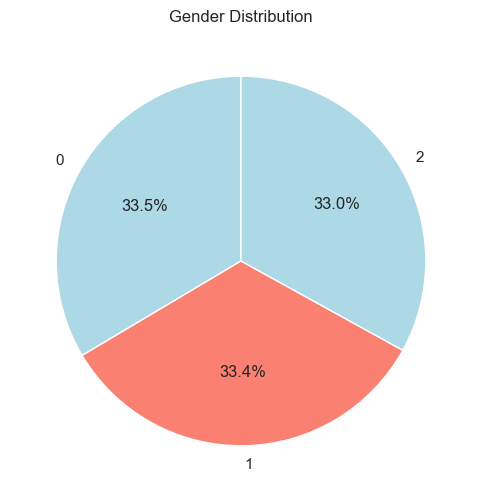

In [43]:
# Plotting a Pie chart for Gender distribution
gender_counts = df1['Gender'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 6))
gender_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightblue', 'salmon'])
plt.title('Gender Distribution')
plt.ylabel('')  # Remove y-axis label
plt.show()


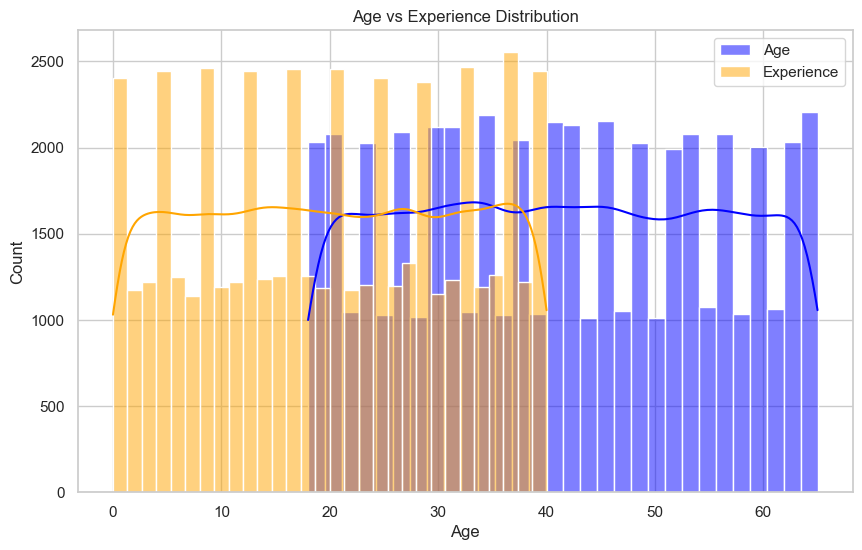

In [44]:
# Overlay histograms for Age and Experience Years
plt.figure(figsize=(10, 6))
sns.histplot(df1['Age'], kde=True, color='blue', label='Age', bins=30)
sns.histplot(df1['Experience_Years'], kde=True, color='orange', label='Experience', bins=30)
plt.legend()
plt.title('Age vs Experience Distribution')
plt.show()


# Training

In [45]:
X = df1.drop("Burnout_Symptoms",axis=1)
y = df1["Burnout_Symptoms"]

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=48)

In [47]:
# Generate data
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Evaluate on test data
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test Score:", test_score)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}
Best Cross-Validation Score: 0.89375
Test Score: 0.9


In [48]:
#Logistic Regression

log_reg = LogisticRegression(max_iter=1000,solver='lbfgs')
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)


# Perform K-fold cross-validation (k=5)

cv_scores = cross_val_score(log_reg, X, y, cv=5)  # cv=5 means 5-fold cross-validation
avg_cv_scores=np.mean(cv_scores)

print(f'K-fold cross validation: {avg_cv_scores:.2f}')

print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

K-fold cross validation: 0.87
Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.80      0.91      0.85        93
           1       0.91      0.80      0.86       107

    accuracy                           0.85       200
   macro avg       0.86      0.86      0.85       200
weighted avg       0.86      0.85      0.86       200



**df1 - results.**

K-fold cross validation: 0.32

Accuracy: 0.34

              precision    recall  f1-score   support

           1       0.34      0.40      0.37      3293
           2       0.34      0.30      0.32      3383
           3       0.33      0.31      0.32      3324

    accuracy                           0.34     10000
    macro avg      0.34      0.34      0.34     10000
    weighted avg   0.34      0.34      0.34     10000

**df - results**

K-fold cross validation: 0.33

Accuracy: 0.34

              precision    recall  f1-score   support

           1       0.34      0.41      0.37      3293
           2       0.34      0.28      0.31      3383
           3       0.33      0.33      0.33      3324

    accuracy                           0.34     10000
    macro avg      0.34      0.34      0.34     10000
    weighted avg   0.34      0.34      0.34     10000

In [49]:
#Decision Tree Classifier

d_tree = DecisionTreeClassifier(random_state=42)
d_tree.fit(X_train, y_train)
y_pred = d_tree.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)


# Perform K-fold cross-validation (k=5)

cv_scores = cross_val_score(d_tree, X, y, cv=5)  # cv=5 means 5-fold cross-validation
avg_cv_scores=np.mean(cv_scores)

print(f'K-fold cross validation: {avg_cv_scores:.2f}')

print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

K-fold cross validation: 0.86
Accuracy: 0.88
              precision    recall  f1-score   support

           0       0.83      0.92      0.87        93
           1       0.93      0.83      0.88       107

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.87       200
weighted avg       0.88      0.88      0.88       200



**df1 - results**

K-fold cross validation: 0.30

Accuracy: 0.33

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.33      0.34      0.34      3293
           2       0.33      0.31      0.32      3383
           3       0.32      0.32      0.32      3324

    accuracy                           0.33     10000
    macro avg      0.24      0.24      0.24     10000
    weighted avg   0.33      0.33      0.32     10000

**df - results**

K-fold cross validation: 0.30

Accuracy: 0.33

              precision    recall  f1-score   support

           1       0.34      0.34      0.34      3293
           2       0.33      0.32      0.33      3383
           3       0.33      0.34      0.33      3324

    accuracy                           0.33     10000
    macro avg      0.33      0.33      0.33     10000
    weighted av    0.33      0.33      0.33     10000

In [50]:
#Random Forest Classifier

r_forest = RandomForestClassifier(n_estimators=100, random_state=42)
r_forest.fit(X_train, y_train)
y_pred = r_forest.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)


# Perform K-fold cross-validation (k=5)

cv_scores = cross_val_score(r_forest, X, y, cv=5)  # cv=5 means 5-fold cross-validation
avg_cv_scores=np.mean(cv_scores)

print(f'K-fold cross validation: {avg_cv_scores:.2f}')

print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

K-fold cross validation: 0.90
Accuracy: 0.90
              precision    recall  f1-score   support

           0       0.85      0.95      0.90        93
           1       0.95      0.86      0.90       107

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200



**df1 - results**

K-fold cross validation: 0.33

Accuracy: 0.34

              precision    recall  f1-score   support

           1       0.33      0.36      0.34      3293
           2       0.33      0.31      0.32      3383
           3       0.34      0.34      0.34      3324

    accuracy                           0.34     10000
    macro avg      0.34      0.34      0.34     10000
    weighted avg   0.34      0.34      0.34     10000

**df - results**

K-fold cross validation: 0.33

Accuracy: 0.33

              precision    recall  f1-score   support

           1       0.33      0.37      0.35      3293
           2       0.33      0.31      0.32      3383
           3       0.34      0.33      0.33      3324

    accuracy                           0.33     10000
    macro avg      0.33      0.34      0.33     10000
    weighted avg   0.33      0.33      0.33     10000


In [88]:
#KNeighboorns Classifier

knn = KNeighborsClassifier(n_neighbors=5)  # k= 5 nearest neighbors
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)


# Perform K-fold cross-validation (k=5)

cv_scores = cross_val_score(knn, X, y, cv=5)  # cv=5 means 5-fold cross-validation
avg_cv_scores=np.mean(cv_scores)

print(f'K-fold cross validation: {avg_cv_scores:.2f}')

print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

K-fold cross validation: 0.81
Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.75      0.88      0.81        93
           1       0.88      0.75      0.81       107

    accuracy                           0.81       200
   macro avg       0.82      0.81      0.81       200
weighted avg       0.82      0.81      0.81       200



**df1 - results**

K-fold cross validation: 0.34

Accuracy: 0.33

              precision    recall  f1-score   support

           1       0.33      0.46      0.38      3293
           2       0.33      0.32      0.33      3383
           3       0.34      0.22      0.27      3324

    accuracy                           0.33     10000
    macro avg      0.33      0.33      0.32     10000
    weighted avg   0.33      0.33      0.32     10000

**df - results**

K-fold cross validation: 0.34

Accuracy: 0.33

              precision    recall  f1-score   support

           1       0.33      0.46      0.38      3293
           2       0.33      0.32      0.33      3383
           3       0.34      0.22      0.27      3324

    accuracy                           0.33     10000
    macro avg      0.33      0.33      0.32     10000
    weighted avg   0.33      0.33      0.32     10000

# **Advance ML train**

In [51]:
data_f = pd.read_csv('corporate_stress_dataset.csv')
df_x = data_f.copy()
df_lgb = data_f.copy()

C:\Users\user\AppData\Local\Temp\ipykernel_20388\722156116.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  data_f = pd.read_csv('corporate_stress_dataset.csv')


In [52]:
df_reduced = klib.data_cleaning(df1)

Shape of cleaned data: (50000, 26) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 8.54 MB (-86.09%)



**XGB**

In [53]:

categorical_cols = df_x.select_dtypes(include=['object']).columns

for col in categorical_cols:
  df_x[col] = df_x[col].astype(str)
  le = LabelEncoder()
  df_x[col] = le.fit_transform(df_x[col])




In [54]:
X = df_x.drop("Burnout_Symptoms",axis=1)
y = df_x["Burnout_Symptoms"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [55]:
# Set XGBoost parameters
params = {
    'objective': 'multi:softprob',  # Multiclass classification with probabilities
    'num_class': 4,                # Number of target classes
    'eval_metric': 'mlogloss',
    'learning_rate': 0.1,
    'max_depth': 6,
    'tree_method': 'hist',
}

# Train the model
model_xgb = xgb.train(params, dtrain, num_boost_round=100, evals=[(dtest, 'test')], early_stopping_rounds=10)

[0]	test-mlogloss:1.36493
[1]	test-mlogloss:1.34554
[2]	test-mlogloss:1.32801
[3]	test-mlogloss:1.31206
[4]	test-mlogloss:1.29764
[5]	test-mlogloss:1.28445
[6]	test-mlogloss:1.27235
[7]	test-mlogloss:1.26139
[8]	test-mlogloss:1.25123
[9]	test-mlogloss:1.24205
[10]	test-mlogloss:1.23336
[11]	test-mlogloss:1.22521
[12]	test-mlogloss:1.21777
[13]	test-mlogloss:1.21096
[14]	test-mlogloss:1.20443
[15]	test-mlogloss:1.19841
[16]	test-mlogloss:1.19292
[17]	test-mlogloss:1.18760
[18]	test-mlogloss:1.18286
[19]	test-mlogloss:1.17814
[20]	test-mlogloss:1.17392
[21]	test-mlogloss:1.16982
[22]	test-mlogloss:1.16612
[23]	test-mlogloss:1.16260
[24]	test-mlogloss:1.15921
[25]	test-mlogloss:1.15611
[26]	test-mlogloss:1.15314
[27]	test-mlogloss:1.15030
[28]	test-mlogloss:1.14770
[29]	test-mlogloss:1.14527
[30]	test-mlogloss:1.14286
[31]	test-mlogloss:1.14075
[32]	test-mlogloss:1.13866
[33]	test-mlogloss:1.13692
[34]	test-mlogloss:1.13504
[35]	test-mlogloss:1.13342
[36]	test-mlogloss:1.13180
[37]	test-m

In [56]:
# Make predictions
y_pred = model_xgb.predict(dtest)
y_pred_class = np.argmax(y_pred, axis=1)  # Convert probabilities to class predictions

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_class)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.34


In [ ]:

# Predict and evaluate
y_pred = (model.predict(test_data) > 0.5).astype(int)
print("Accuracy:", accuracy_score(y_test, y_pred))

In [ ]:
Accuracy: 0.885

**lightgbm**

In [58]:
df_reduced = klib.data_cleaning(df1)


Shape of cleaned data: (50000, 26) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 8.54 MB (-86.09%)



In [92]:
for col in df1.columns:
  if df1[col].isnull().sum()>0:
    if df1[col].dtype == 'object':
      df1[col].fillna(df1[col].mode()[0], inplace=True)
    else:
      df1[col].fillna(df1[col].mean(), inplace=True)

In [93]:

categorical_columns = df_lgb.select_dtypes(include=['category', 'object']).columns.tolist()
categorical_columns.remove('Burnout_Symptoms')

for col in categorical_columns:
    df_lgb[col] = df_lgb[col].astype('category')

categorical_columns

['Gender',
 'Marital_Status',
 'Job_Role',
 'Health_Issues',
 'Company_Size',
 'Department',
 'Mental_Health_Leave_Taken',
 'Location']

In [94]:
label_encoder = LabelEncoder()
df_lgb['Burnout_Symptoms'] = label_encoder.fit_transform(df_lgb['Burnout_Symptoms'])

In [95]:
# Define the data and the labels
X = df_lgb.drop("Burnout_Symptoms",axis=1)
y = df_lgb["Burnout_Symptoms"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create LightGBM dataset with categorical features specified
train_data = lgb.Dataset(X_train, label=y_train, categorical_feature=categorical_columns)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data, categorical_feature=categorical_columns)



In [96]:
# Train the model with appropriate parameters

params = {
    'objective': 'multiclass',
    'num_class': 4,
    'metric': 'multi_logloss',
    'boosting_type': 'gbdt',
    'learning_rate': 0.1,
    'num_leaves': 31
}

model_lgb = lgb.train(params, train_data, valid_sets=[test_data], num_boost_round=100, callbacks=[lgb.early_stopping(stopping_rounds=10)])



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001032 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1313
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 29
[LightGBM] [Info] Start training from score -10.596635
[LightGBM] [Info] Start training from score -1.095492
[LightGBM] [Info] Start training from score -1.094894
[LightGBM] [Info] Start training from score -1.105561
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[2]	valid_0's multi_logloss: 1.099


In [97]:
y_pred = model_lgb.predict(X_test)
y_pred_class = [np.argmax(row) for row in y_pred]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_class)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.33


In [28]:


X = df1.drop('Burnout_Symptoms', axis=1)
y = df1['Burnout_Symptoms']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import cross_val_score

# Initialize Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
print("\nDecision Tree Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("F1 Score:", f1_score(y_test, y_pred_dt, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_dt, average='weighted'))
print("Precision:", precision_score(y_test, y_pred_dt, average='weighted'))

# K-fold Cross-validation
cv_scores_dt = cross_val_score(dt_model, X, y, cv=5)
print("Cross-validation Scores:", cv_scores_dt)
print("Mean Cross-validation Score:", cv_scores_dt.mean())



Decision Tree Performance:
Accuracy: 0.3315
F1 Score: 0.33151040592038966
Recall: 0.3315
Precision: 0.33173406650566756


c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-validation Scores: [0.3306 0.3362 0.3282 0.331  0.3349]
Mean Cross-validation Score: 0.33218000000000003


In [32]:
# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("\nRandom Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_rf, average='weighted'))
print("Precision:", precision_score(y_test, y_pred_rf, average='weighted'))

# K-fold Cross-validation
cv_scores_rf = cross_val_score(rf_model, X, y, cv=5)
print("Cross-validation Scores:", cv_scores_rf)
print("Mean Cross-validation Score:", cv_scores_rf.mean())



Random Forest Performance:
Accuracy: 0.3384
F1 Score: 0.33775180276681777
Recall: 0.3384
Precision: 0.3387892836744063


c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-validation Scores: [0.3255 0.3348 0.3327 0.3384 0.3423]
Mean Cross-validation Score: 0.33474


In [33]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model
logreg_model = LogisticRegression(random_state=42, max_iter=1000)

# Train the model
logreg_model.fit(X_train, y_train)

# Make predictions
y_pred_logreg = logreg_model.predict(X_test)

# Evaluate the model
print("\nLogistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("F1 Score:", f1_score(y_test, y_pred_logreg, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_logreg, average='weighted'))
print("Precision:", precision_score(y_test, y_pred_logreg, average='weighted'))

# K-fold Cross-validation
cv_scores_logreg = cross_val_score(logreg_model, X, y, cv=5)
print("Cross-validation Scores:", cv_scores_logreg)
print("Mean Cross-validation Score:", cv_scores_logreg.mean())



Logistic Regression Performance:
Accuracy: 0.3338
F1 Score: 0.3313572146415286
Recall: 0.3338
Precision: 0.33525652136417683


c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-validation Scores: [0.3319 0.3322 0.3371 0.3424 0.334 ]
Mean Cross-validation Score: 0.33552


In [34]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN model
knn_model = KNeighborsClassifier()

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
print("\nKNN Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("F1 Score:", f1_score(y_test, y_pred_knn, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_knn, average='weighted'))
print("Precision:", precision_score(y_test, y_pred_knn, average='weighted'))

# K-fold Cross-validation
cv_scores_knn = cross_val_score(knn_model, X, y, cv=5)
print("Cross-validation Scores:", cv_scores_knn)
print("Mean Cross-validation Score:", cv_scores_knn.mean())



KNN Performance:
Accuracy: 0.3241
F1 Score: 0.3148608068808814
Recall: 0.3241
Precision: 0.3239435835546787


c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-validation Scores: [0.3347 0.3385 0.3429 0.3302 0.334 ]
Mean Cross-validation Score: 0.33606


In [35]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import cross_val_score

# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("\nXGBoost Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_xgb, average='weighted'))
print("Precision:", precision_score(y_test, y_pred_xgb, average='weighted'))

# K-fold Cross-validation
cv_scores_xgb = cross_val_score(xgb_model, X, y, cv=5)
print("Cross-validation Scores:", cv_scores_xgb)
print("Mean Cross-validation Score:", cv_scores_xgb.mean())



XGBoost Performance:
Accuracy: 0.3364
F1 Score: 0.33639592985298905
Recall: 0.3364
Precision: 0.336602420650814


c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-validation Scores: [0.3292 0.3379 0.3293 0.3409    nan]
Mean Cross-validation Score: nan


c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
  File "c:\Users\user\AppData\Local\Programs\Python\Python31

In [36]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import cross_val_score

# Initialize LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=42)

# Train the model
lgb_model.fit(X_train, y_train)

# Make predictions
y_pred_lgb = lgb_model.predict(X_test)

# Evaluate the model
print("\nLightGBM Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_lgb))
print("F1 Score:", f1_score(y_test, y_pred_lgb, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_lgb, average='weighted'))
print("Precision:", precision_score(y_test, y_pred_lgb, average='weighted'))

# K-fold Cross-validation
cv_scores_lgb = cross_val_score(lgb_model, X, y, cv=5)
print("Cross-validation Scores:", cv_scores_lgb)
print("Mean Cross-validation Score:", cv_scores_lgb.mean())



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009383 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 924
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 26
[LightGBM] [Info] Start training from score -10.596635
[LightGBM] [Info] Start training from score -1.095492
[LightGBM] [Info] Start training from score -1.094894
[LightGBM] [Info] Start training from score -1.105561
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010247 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 923
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 26
[LightGBM] [Info] Start training from score -10.596635
[LightGBM] [Info] Start training from score -1.098937
[LightGBM] [Info] Start training from score -1.098037
[LightGBM] [Info] Start training from score -1.098937
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

In [ ]:
smote = SMOTE(k_neighbors=2, random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

In [40]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train_res, y_train_res = ros.fit_resample(X_train, y_train)


In [41]:
# Remove classes with less than a threshold number of samples (e.g., 2 samples)
threshold = 2
y_train_filtered = y_train[y_train.isin(y_train.value_counts()[y_train.value_counts() >= threshold].index)]
X_train_filtered = X_train[y_train.isin(y_train_filtered)]


In [42]:
# Proceed with resampling on the filtered data
smote = SMOTE(k_neighbors=2, random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_filtered, y_train_filtered)

In [51]:
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Evaluate on test data
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test Score:", test_score)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}
Best Cross-Validation Score: 0.89375
Test Score: 0.9


In [52]:
from sklearn.linear_model import LogisticRegression

# Define the model
model = LogisticRegression(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
    'class_weight': [None, 'balanced']  # Handle class imbalance
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Evaluate on test data
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test Score:", test_score)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'C': 0.1, 'class_weight': None, 'solver': 'liblinear'}
Best Cross-Validation Score: 0.86875
Test Score: 0.865


In [53]:
from sklearn.svm import SVC

# Define the model
model = SVC(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Evaluate on test data
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test Score:", test_score)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best Cross-Validation Score: 0.87375
Test Score: 0.88


In [54]:
from sklearn.neighbors import KNeighborsClassifier

# Define the model
model = KNeighborsClassifier()

# Define the hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Evaluate on test data
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test Score:", test_score)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
Best Cross-Validation Score: 0.8487500000000001
Test Score: 0.83


In [55]:
from sklearn.ensemble import GradientBoostingClassifier

# Define the model
model = GradientBoostingClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Evaluate on test data
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test Score:", test_score)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 50}
Best Cross-Validation Score: 0.91375
Test Score: 0.88


In [56]:
# Example with RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the model
model = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Evaluate on test data
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test Score:", test_score)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation Score: 0.89375
Test Score: 0.89


In [57]:
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.7, 0.8, 1.0]
}

# Set up GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search_xgb.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters:", grid_search_xgb.best_params_)
print("Best Cross-Validation Score:", grid_search_xgb.best_score_)

# Evaluate on test data
best_model_xgb = grid_search_xgb.best_estimator_
test_score_xgb = best_model_xgb.score(X_test, y_test)
print("Test Score:", test_score_xgb)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:49:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100, 'subsample': 1.0}
Best Cross-Validation Score: 0.91375
Test Score: 0.885


In [58]:
# Define the model
lgb_model = lgb.LGBMClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.3],
    'num_leaves': [31, 50, 100]
}

# Set up GridSearchCV
grid_search_lgb = GridSearchCV(estimator=lgb_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search_lgb.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters:", grid_search_lgb.best_params_)
print("Best Cross-Validation Score:", grid_search_lgb.best_score_)

# Evaluate on test data
best_model_lgb = grid_search_lgb.best_estimator_
test_score_lgb = best_model_lgb.score(X_test, y_test)
print("Test Score:", test_score_lgb)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
[LightGBM] [Info] Number of positive: 393, number of negative: 407
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001783 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5100
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.491250 -> initscore=-0.035004
[LightGBM] [Info] Start training from score -0.035004
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [64]:
import os

current_directory = os.getcwd()

file_path = os.path.join(current_directory, 'submission_file.csv')

df1.to_csv(file_path, index=False)

print(f"File saved at: {file_path}")


File saved at: c:\Users\user\Desktop\Group Project 1\submission_file.csv
